In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

     |████████████████████████████████| 727kB 31.6MB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
     |████████████████████████████████| 1.2MB 46.3MB/s 
     |████████████████████████████████| 194kB 49.7MB/s 
     |████████████████████████████████| 61kB 9.6MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 
Mounted at /content/gdrive


In [7]:
spectrogram_types = 'COVID_POSITIVE','COVID_NEGATIVE'
path = Path('/content/gdrive/MyDrive/Hack3/COVID_Spectrogram/Train')

In [15]:
spectrogram = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms = Resize(64)
)

dls = spectrogram.dataloaders(path)

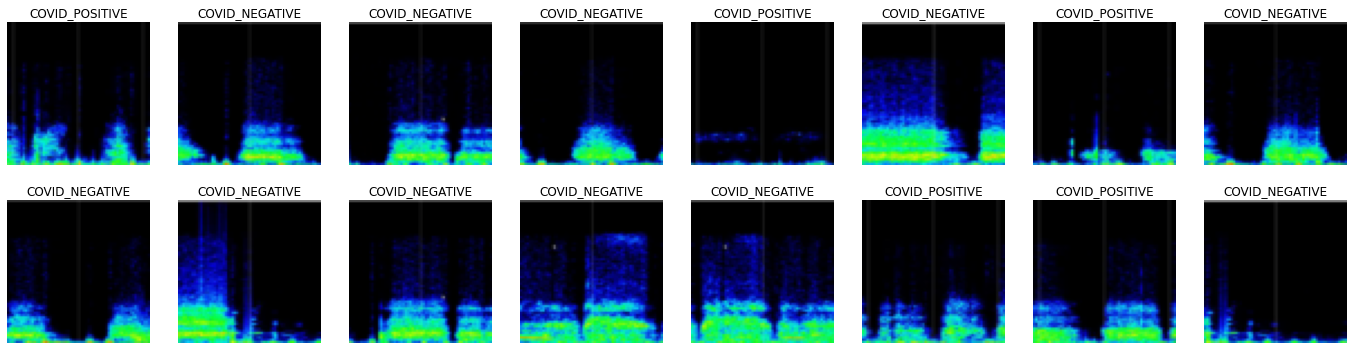

In [16]:
dls.valid.show_batch(max_n=16, nrows=2)

In [18]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.341279,0.072662,0.968326,00:32


epoch,train_loss,valid_loss,accuracy,time
0,0.014072,0.000503,1.000000,00:32


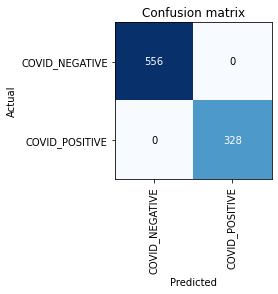

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

This is to export the model:

In [20]:
learn.export()

In [21]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [22]:
learn_inf = load_learner(path/'export.pkl')

In [23]:
learn_inf.predict('/content/gdrive/MyDrive/Hack3/COVID_Spectrogram/Test/COVID_NEGATIVE/covidneg_test_3.jpg')


('COVID_NEGATIVE', tensor(0), tensor([1.0000e+00, 1.6871e-08]))